In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from  os import listdir
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [18]:
# file = open('transformed', 'rb')
# transformed = pickle.loads(file.read())
# file.close()

In [2]:
file = open('RF1', 'rb')
RF = pickle.loads(file.read())
file.close()

In [3]:
Stars = pd.concat([pd.read_csv('/home/rasta/BD_stars/' + i) for i in listdir('/home/rasta/BD_stars/')[50:150]], ignore_index=True)

In [4]:
d = ['solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra', 'dec',
       'parallax', 'pmra', 'pmdec', 'ra_dec_corr', 'ra_parallax_corr',
       'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr',
       'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr',
       'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_chi2_al', 'astrometric_excess_noise',
        'astrometric_params_solved','flame_flags','astrometric_excess_noise_sig',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'mean_varpi_factor_al','phot_g_n_obs','phot_rp_n_obs','phot_proc_mode',
       'astrometric_matched_observations', 'visibility_periods_used',
       'astrometric_sigma5d_max', 'frame_rotator_object_type',
       'matched_observations', 'duplicated_source', 'l', 'b', 'ecl_lon', 'ecl_lat', 'priam_flags', 'designation', 'phot_variable_flag']

In [5]:
Stars.drop(d, axis=1,inplace = True)

In [6]:
a = []
a = [i for i in Stars.columns if 'error' in i or 'lower' in i or 'upper' in i]
Stars = Stars.drop(a, axis=1)

In [7]:
Stars.dropna(inplace = True)

In [8]:
scaler = MinMaxScaler()
x1 = scaler.fit_transform(Stars[:])

In [9]:
x1 = pd.DataFrame(x1, columns=Stars.columns)

In [10]:
for i in ['phot_rp_mean_flux', 'phot_g_mean_flux', 'phot_bp_mean_flux',
       'astrometric_gof_al', 'lum_val', 'astrometric_pseudo_colour']:
    x1[i] = x1[i] * 10
x1 = np.array(x1)

In [11]:
del Stars
del a
del d
del file
#del scalet

In [12]:
x1.shape

(10652, 23)

In [13]:
model = TSNE(n_components=3, learning_rate=10)
transformed = model.fit_transform(x1)

In [14]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
z_axis = transformed[:, 2]

In [15]:
tt = RF.predict(x1)

<IPython.core.display.Javascript object>


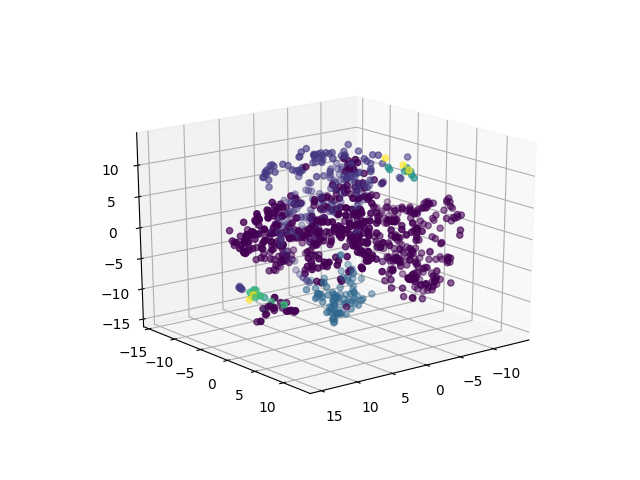

In [20]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_axis[:1000], y_axis[:1000], z_axis[:1000], c = tt[:1000])